In [1]:
from world import PDDLWorld
import os
from colour_dict import colour_names


In [2]:
problem_dir = 'onerule'
problems = list(os.listdir(problem_dir))
w = PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl


In [3]:
obs = w.sense(obscure=False)
for a in obs.state:
    print(a.asPDDL())

(arm-empty )
(on-table b0)
(clear b0)
(on-table b1)
(clear b1)
(on-table b2)
(clear b2)
(on-table b3)
(clear b3)
(on-table b4)
(clear b4)
(on-table b5)
(clear b5)
(on-table b6)
(clear b6)
(on-table b7)
(clear b7)
(on-table b8)
(clear b8)
(on-table b9)
(clear b9)
(in-tower t0)
(clear t0)
(greenyellow b0)
(green b0)
(red b1)
(orange b2)
(yellow b3)
(pink b4)
(blue b5)
(bisque b6)
(orange b6)
(lightyellow b7)
(yellow b7)
(darkviolet b8)
(purple b8)
(indigo b9)
(purple b9)


In [20]:
from agents import PerfectColoursAgent
from teacher import TeacherAgent
w = PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))
teacher = TeacherAgent()
agent = PerfectColoursAgent(w, teacher=teacher)
print(agent.goal.asPDDL())
w = PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))
agent.new_world(w)
print(agent.goal.asPDDL())

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl
(forall (?x) (in-tower ?x))
Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl
(forall (?x) (in-tower ?x))


'(forall (?x) (in-tower ?x))'

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl


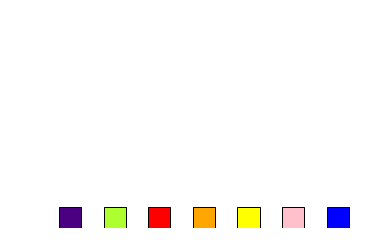

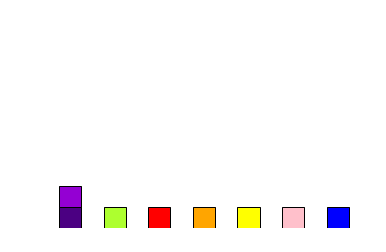

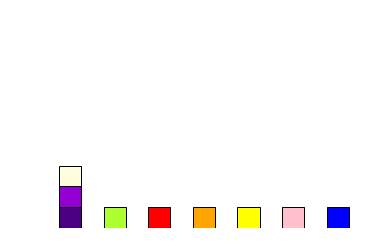

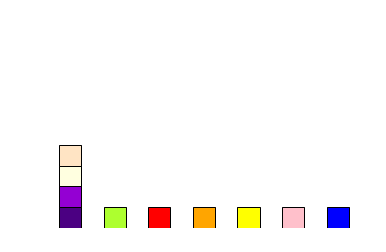

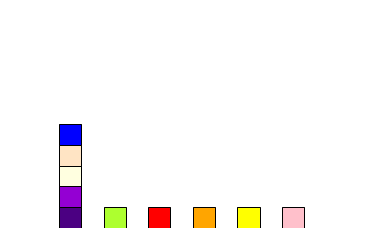

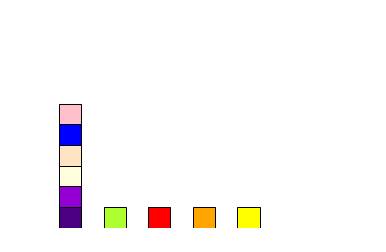

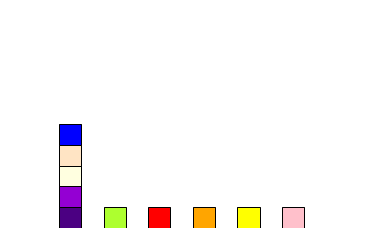

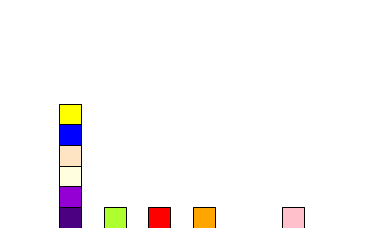

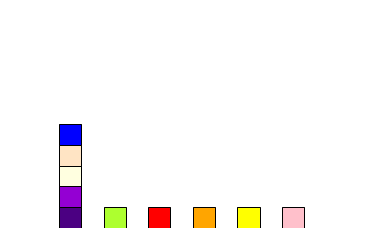

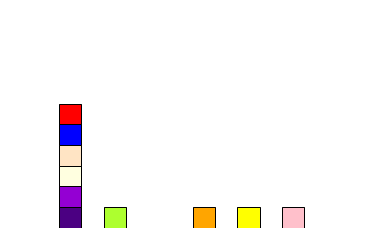

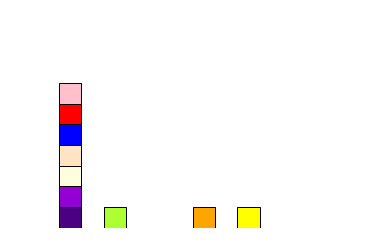

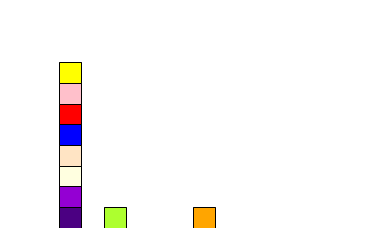

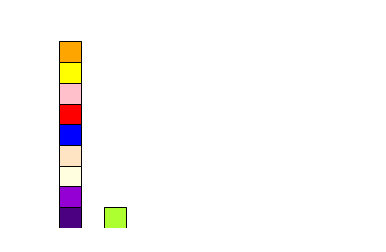

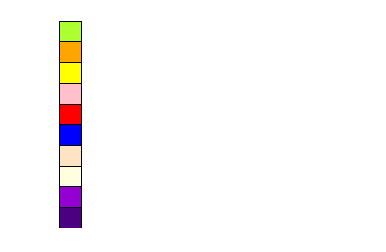

In [17]:

while not w.test_success():
    plan = agent.plan()
    for a, args in plan:
        if a == 'reach-goal':
            break
        w.update(a, args)
        if True:
            w.draw()
        correction = agent.teacher.correction(w)
        if correction:
            agent.get_correction(correction, a, args)
            if True:
                w.draw()
            break

In [14]:
agent.goal.asPDDL()

'(forall (?x) (in-tower ?x))'